In [106]:
import matplotlib.pyplot as plt
import mysql.connector
import numpy as np

In [4]:
mydb = mysql.connector.connect(
    host="localhost",
    user="student",
    password="student")
print(mydb)

In [65]:
mycursor = mydb.cursor()
mycursor2 = mydb.cursor()
mycursor.execute("USE proyecto_final")
mycursor2.execute("USE proyecto_final")

In [29]:
mycursor.execute("select nombre, siglas, posicion_hindex from Universidades where posicion_hindex is not null order by posicion_hindex asc limit 10")
unis = []
siglas = []
posiciones = []
for x in mycursor:
    unis.append(x[0])
    siglas.append(x[1])
    posiciones.append(x[2])
i = 0
for x in posiciones:
    posiciones[i] = 9-x
    i = i +1
posiciones

[8, 7, 6, 5, 4, 4, 3, 2, 2, 1]

In [52]:
diccionario_colores = {
    1:'red',
    2:'orange',
    3:'yellow',
    4:'green',
    5:'blue',
    6:'purple',
    7:'pink',
    8:'brown',
    9:'gray'
}
posiciones=np.arange(1,num_p)

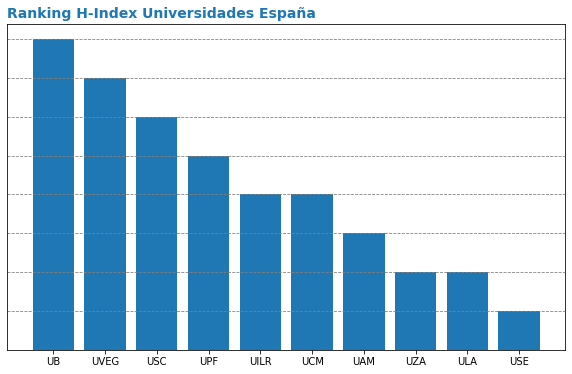

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_yticklabels([])
ax.bar(siglas, posiciones)
ax.tick_params(left=False)
ax.set_title('Ranking H-Index Universidades España', loc = 'left', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.grid(axis ='y', color = 'gray', linestyle = 'dashed')

In [71]:
mycursor.execute("select id_univ, puntuacion from Rankings where id_campo=6 and puntuacion is not null  order by puntuacion desc limit 10")
myresult=mycursor.fetchall()
unis = []
puntuaciones = []
for x in myresult:
    sqlQ=("select siglas from Universidades where id=%s")
    mycursor.execute(sqlQ, (x[0],))
    res = mycursor.fetchall()
    uni = res[0][0]
    unis.append(uni)
    puntuaciones.append(x[1])

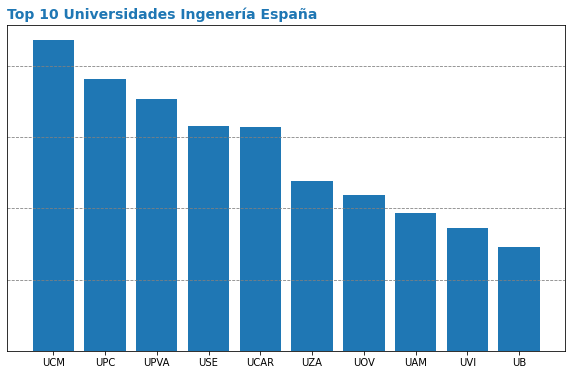

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_yticklabels([])
ax.bar(unis, puntuaciones)
ax.tick_params(left=False)
ax.set_title('Top 10 Universidades Ingenería España', loc = 'left', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.grid(axis ='y', color = 'gray', linestyle = 'dashed')

In [97]:
mycursor.execute("select id_fac, nombre, empleabilidad from Grados where empleabilidad is not null  order by empleabilidad asc limit 10;")
myresult=mycursor.fetchall()
grados = []
empleabilidad = []
for x in myresult:
    sqlQ=("select id_univ from Facultades where id=%s")
    mycursor.execute(sqlQ, (x[0], ))
    res = mycursor.fetchall()
    fac = res[0][0]
    sqlQ=("select siglas from Universidades where id=%s")
    mycursor.execute(sqlQ, (fac, ))
    res = mycursor.fetchall()
    uni = res[0][0]
    grados.append(x[1]+' '+uni)
    empleabilidad.append(x[2])

/tmp/ipykernel_6836/2880438397.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grados, rotation =45, ha='right')


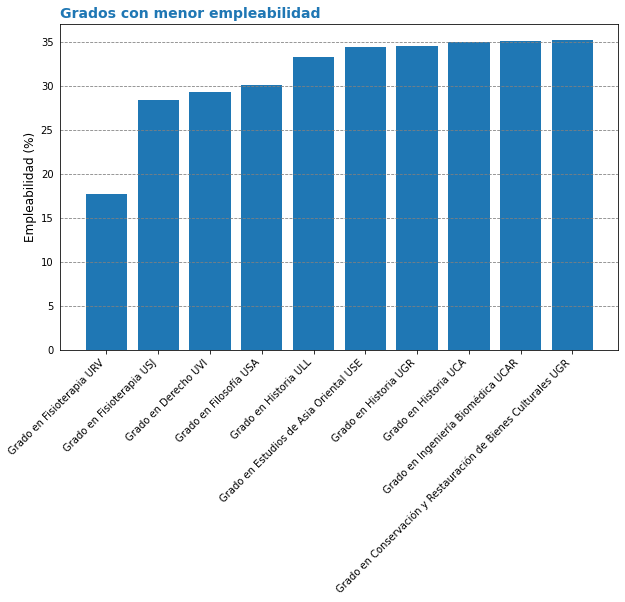

In [101]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(grados, empleabilidad)
ax.tick_params(left=False)
ax.set_xticklabels(grados, rotation =45, ha='right')
plt.ylabel('Empleabilidad (%)', fontsize=12)
ax.set_title('Grados con menor empleabilidad', loc = 'left', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.grid(axis ='y', color = 'gray', linestyle = 'dashed')

In [102]:
mycursor.execute("select id_fac, nombre, empleabilidad from Grados where empleabilidad is not null  order by empleabilidad desc limit 10;")
myresult=mycursor.fetchall()
grados = []
empleabilidad = []
for x in myresult:
    sqlQ=("select id_univ from Facultades where id=%s")
    mycursor.execute(sqlQ, (x[0], ))
    res = mycursor.fetchall()
    fac = res[0][0]
    sqlQ=("select siglas from Universidades where id=%s")
    mycursor.execute(sqlQ, (fac, ))
    res = mycursor.fetchall()
    uni = res[0][0]
    grados.append(x[1]+' '+uni)
    empleabilidad.append(x[2])

/tmp/ipykernel_6836/1148746660.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grados, rotation =45, ha='right')


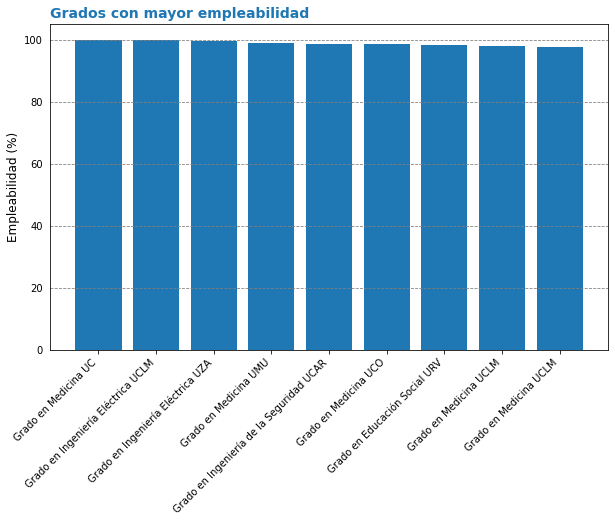

In [103]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(grados, empleabilidad)
ax.tick_params(left=False)
ax.set_xticklabels(grados, rotation =45, ha='right')
plt.ylabel('Empleabilidad (%)', fontsize=12)
ax.set_title('Grados con mayor empleabilidad', loc = 'left', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.grid(axis ='y', color = 'gray', linestyle = 'dashed')

In [104]:
mycursor.execute("select id_fac, nombre, nota_corte, nota_corte_ant, nota_corte*100/nota_corte_ant-1 as incremento from Grados where nota_corte_ant <> 5 order by incremento desc limit 10;")
myresult=mycursor.fetchall()
grados = []
nota_corte = []
nota_corte_ant = []
for x in myresult:
    sqlQ=("select id_univ from Facultades where id=%s")
    mycursor.execute(sqlQ, (x[0], ))
    res = mycursor.fetchall()
    fac = res[0][0]
    sqlQ=("select siglas from Universidades where id=%s")
    mycursor.execute(sqlQ, (fac, ))
    res = mycursor.fetchall()
    uni = res[0][0]
    grados.append(x[1]+' '+uni)
    nota_corte.append(x[2])
    nota_corte_ant.append(x[3])

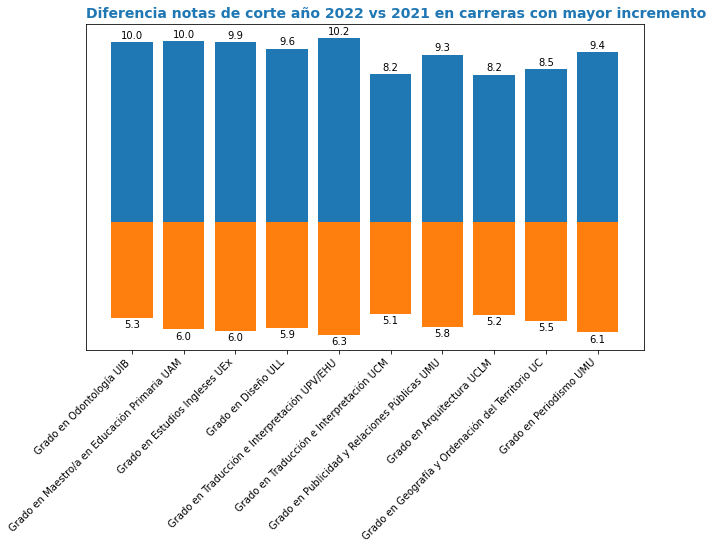

In [143]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xticks(np.arange(len(grados)))
ax.set_xticklabels(grados,rotation=45,ha='right')
ax.set_yticks([])
rect_actuales= ax.bar(np.arange(len(grados)), nota_corte, label='Notas actuales')
rect_antes= ax.bar(np.arange(len(grados)), [-y for y in nota_corte_ant], label='Notas previas')
for rect in rect_actuales + rect_antes:
    height=rect.get_height()
    if height>=0:
        ax.text(rect.get_x() + rect.get_width() / 2., height + 0.1, f'{height:.1f}', ha='center', va='bottom')
    else:
        ax.text(rect.get_x() + rect.get_width() / 2., height - 0.1, f'{abs(height):.1f}', ha='center', va='top')
ax.set_title('Diferencia notas de corte año 2022 vs 2021 en carreras con mayor incremento', loc = 'left', fontdict={'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()